In [7]:
import pandas as pd
a = pd.read_csv('preprocessed_dataset.csv')
a

,User,Date,tweet,Label
0,HcIndependen,2023-06-26 23:59:44+00:00,tethub bebas roket utang utang utang utang uta...,"[{'entity': 'LABEL_0', 'score': 0.66798365, 'i..."
1,theforge8888,2023-06-26 23:55:34+00:00,pusing ya muncul ulang ulang ada salah 1 korpo...,"[{'entity': 'LABEL_0', 'score': 0.634499, 'ind..."
2,24b5cc37e61d40f,2023-06-26 23:54:20+00:00,maksimal kerja polisi republik indonesia jaksa...,"[{'entity': 'LABEL_0', 'score': 0.6431781, 'in..."
3,DavinaSastro,2023-06-26 23:53:37+00:00,jerat sih sebar hoaks korupsi payment gate,"[{'entity': 'LABEL_0', 'score': 0.63950497, 'i..."
4,rangkutifuat,2023-06-26 23:49:36+00:00,ai gagal bukti indonesia kuasa capai turun ban...,"[{'entity': 'LABEL_0', 'score': 0.61524886, 'i..."
...,...,...,...,...
14030,reifeiza,2023-06-18 02:19:00+00:00,dengar dengar nih prabowo menhan niat deh hapu...,"[{'entity': 'LABEL_0', 'score': 0.7200499, 'in..."
14031,reifeiza,2023-06-18 02:18:30+00:00,main main nih prabowo menhan janji ada budaya ...,"[{'entity': 'LABEL_0', 'score': 0.634833, 'ind..."
14032,reifeiza,2023-06-18 02:18:00+00:00,keren deh prabowo menhan fokus hapus budaya ko...,"[{'entity': 'LABEL_0', 'score': 0.59646165, 'i..."
14033,sastrotingkir,2023-06-18 02:17:42+00:00,senang cak thotiq mugo mugo kesandung korupsi,"[{'entity': 'LABEL_0', 'score': 0.6720887, 'in..."


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import pandas as pd

tfidf = TfidfVectorizer()

a['tweet'] = a['tweet'].fillna(' ') # Replace np.nan values with empty string
tweet_data = tfidf.fit_transform(a.tweet.values)
tweet_data = pd.DataFrame(tweet_data.todense())
tweet_data = tweet_data.fillna(0)

bestfeatures = SelectKBest(score_func=chi2, k=100)
bestfeatures.fit(tweet_data, a.tweet)

X = bestfeatures.transform(tweet_data)
print(X.shape)


(14035, 100)


In [12]:
import gensim
import numpy as np
from gensim.models.fasttext import load_facebook_model

fasttext = gensim.models.fasttext.load_facebook_model("C:/Users/rizky/Downloads/Gemastik tahun lalu/Gemastik/Pre-trained Word Embedding/Fastext_model_tweet.bin")
print("Ada %s vektor kata yang ditemukan dalam model FastText" % len(fasttext.wv))

"""_Merepresentasikan setiap tweet ke dalam vektor bilangan real_"""

vectors = []
for text in a.tweet.values:
    word_embedding = []
    for word in text.split(" "):
        try:
            word_vec = fasttext.wv[word]
            word_embedding.append(word_vec)
        except:
            pass
    word_embedding = np.array(word_embedding)
    embeddings = np.mean(word_embedding, axis=0)
    vectors.append(embeddings)
vectors = np.array(vectors)
print("Dimensi dari fitur yang digunakan yaitu", (vectors.shape))

Ada 69465 vektor kata yang ditemukan dalam model FastText
Dimensi dari fitur yang digunakan yaitu (14035, 100)


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=80)
X_PCA = pca.fit_transform(vectors)

### Using SVM Model

In [14]:
from time import time
import joblib

start = time()
loaded_model = joblib.load("C:/Users/rizky/Downloads/menganalisis emosi berdasarkan dataset/SVMRBF_model.sav")
Y_predSVM = loaded_model.predict(X_PCA)
# acc_score = accuracy_score(Y_test, Y_pred)
end = time()
elapsed = end - start

# print(Y_pred)
print("Lama waktu yang dibutuhkan untuk memproses yaitu %.2f detik." % (elapsed))

C:\Users\rizky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.0.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Lama waktu yang dibutuhkan untuk memproses yaitu 5.94 detik.


### Using Random Forest Model

In [17]:
from time import time
import joblib

start = time()
loaded_model = joblib.load("C:/Users/rizky/Download/menganalisis emosi berdasarkan dataset/RF_model.sav")
Y_predRF = loaded_model.predict(X_PCA)
# acc_score = accuracy_score(Y_test, Y_pred)
end = time()
elapsed = end - start

# print(Y_pred)
print("Lama waktu yang dibutuhkan untuk memproses yaitu %.2f detik." % (elapsed))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/rizky/Download/menganalisis emosi berdasarkan dataset/RF_model.sav'

In [18]:
a = pd.read_csv('preprocessed_dataset.csv')
a['label'] = Y_predSVM
a.head()

,User,Date,tweet,Label,label
0,HcIndependen,2023-06-26 23:59:44+00:00,tethub bebas roket utang utang utang utang uta...,"[{'entity': 'LABEL_0', 'score': 0.66798365, 'i...",sadness
1,theforge8888,2023-06-26 23:55:34+00:00,pusing ya muncul ulang ulang ada salah 1 korpo...,"[{'entity': 'LABEL_0', 'score': 0.634499, 'ind...",sadness
2,24b5cc37e61d40f,2023-06-26 23:54:20+00:00,maksimal kerja polisi republik indonesia jaksa...,"[{'entity': 'LABEL_0', 'score': 0.6431781, 'in...",love
3,DavinaSastro,2023-06-26 23:53:37+00:00,jerat sih sebar hoaks korupsi payment gate,"[{'entity': 'LABEL_0', 'score': 0.63950497, 'i...",anger
4,rangkutifuat,2023-06-26 23:49:36+00:00,ai gagal bukti indonesia kuasa capai turun ban...,"[{'entity': 'LABEL_0', 'score': 0.61524886, 'i...",sadness


In [13]:
b = pd.read_csv('data_cleaning.csv')
b['label'] = Y_predRF
b.head()

,Datetime,Tweet id,Place,Text,Username,label
0,2023-04-09 21:47:10+00:00,1645181583606034433,NaN,bangun sahur tahrim azan keras pakai speaker m...,ocinrafdy,sadness
1,2023-04-09 21:09:39+00:00,1645172145264431104,NaN,omggggg rumah toa masjid ngadep rumah bikin ku...,dini_sabil,happy
2,2023-04-09 20:13:41+00:00,1645158058757324800,NaN,data polusi udara 3am,wellylie99,anger
3,2023-04-09 19:48:14+00:00,1645151655430852608,NaN,data aplikasi sesuai bakar sampah polusi udara...,wellylie99,anger
4,2023-04-09 19:26:55+00:00,1645146288462381056,NaN,data polusi udara jaka a 2 am senin level pm 2...,wellylie99,happy


In [11]:
new_df = a[['Datetime','Text','label','Place']]
new_df.to_csv('rivamintadataRF.csv',index=False)
new_df

,Datetime,Text,label,Place
0,2023-04-09 21:47:10+00:00,"Jangankan buat bangunin sahur, sedang ""tahrim""...",anger,NaN
1,2023-04-09 21:09:39+00:00,"Omggggg rumah juga gitu, di tempat yg sekarang...",anger,NaN
2,2023-04-09 20:13:41+00:00,Data polusi udara pukul 3am https://t.co/NIrMJ...,anger,NaN
3,2023-04-09 19:48:14+00:00,Semua data aplikasi sesuai.. jika tidak bakar ...,anger,NaN
4,2023-04-09 19:26:55+00:00,Data polusi udara jakarta pukul 2 am dini hari...,anger,NaN
...,...,...,...,...
1252,2023-01-22 10:58:52+00:00,"@iIhamzada Kanjuruhan itu jelas kok, gak usah ...",happy,NaN
1253,2023-01-21 07:35:36+00:00,Udah tahu belum ?!? Daerah Serang dan Cilegon ...,happy,NaN
1254,2023-01-21 06:06:13+00:00,@kemasadri @lucaxyzz @notafanofsushi @adriansy...,anger,NaN
1255,2023-01-21 02:12:16+00:00,@PakkatDayak Dulu...\nSaya pecinta asap dan ko...,happy,NaN


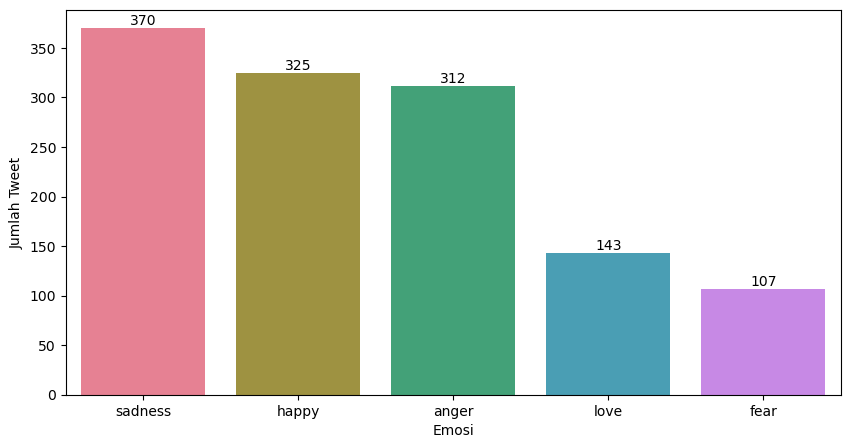

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ax = plt.subplots(figsize=(10, 5))
number = [count for count in a.label.value_counts()]
labels = list(a.label.value_counts().index)
sns.barplot(x=labels, y=number, palette="husly")
ax.set_xlabel("Emosi")
ax.set_ylabel("Jumlah Tweet")
ax.bar_label(ax.containers[0])
plt.show()

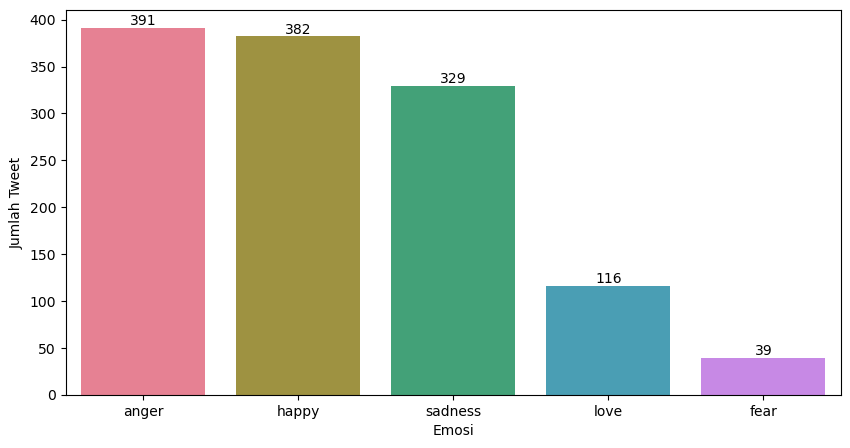

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ax = plt.subplots(figsize=(10, 5))
number = [count for count in b.label.value_counts()]
labels = list(b.label.value_counts().index)
sns.barplot(x=labels, y=number, palette="husl")
ax.set_xlabel("Emosi")
ax.set_ylabel("Jumlah Tweet")
ax.bar_label(ax.containers[0])
plt.show()